# Data Analysis and Data Science
## Be curious about the methods

By: Caroline Labelle
<br>For: BIM6065-C

<br>
Date: July 5th 2024

<hr style="border:1px solid black"> </hr>


In [ ]:
Name: 

## Notes on data visualization of multiple distributions

The Seaborn `histplot()` allows us to plot univariate or bivariate histograms to show distributions of datasets. We can distinguish bewteen groups of distribution (e.g. outcomes) using the `hue` parameters. What if we want to plot our disibutions based on two grouping variables? Or, what if we want to seperate the disitrbutions in distinc subplots?

Similar to `regplot()` vs. `lmplot()`, there exists a function to plot histograms as `GridFacets`: `sns.displot()`. Its parameters are mostly similar to those of `histplot()`, with the addition of `GridFacets` parameters, such as `col` and `row`.

Ressource: https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot


In [2]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("/u/dbim6065/datasets/gene_expression_cancer_1.csv", sep=",", header=0)

# =============================== histplot() ==============================================
p = sns.histplot(data, x="BCL2", bins=25, hue="Results", multiple="stack")
p.set_title("BCL2 expression by Outcome results")

sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1), title=None, frameon=False)
sns.despine()

# =============================== displot() ==============================================
p = sns.displot(data, x="BCL2", bins=25, col="Results")
sns.despine()

PermissionError: [Errno 13] Permission denied: '/u/dbim6065/datasets/gene_expression_cancer_1.csv'

## Installing and importing Python libraries

Befor using (or importing) a library in Python, you first need to install it!. This step only need to be done once for each library: once istalled, you will have access to all the libraries from your coding environment.

Ressource: https://pip.pypa.io/en/stable/user_guide/

In [3]:
### Installing scikit-learn

In [4]:
### Import sklearn
import sklearn.decomposition, sklearn.cluster

### Import scipy
import scipy as sp

### Import pandas, numpy, seaborn and matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt

In [5]:
sns.set(rc={'figure.figsize':(4, 2)})
sns.set_theme(context="notebook", style="white", palette="Set2")

We will be mainly using the <code>sklearn</code> and <code>scipy</code> libraries to implement and use various data analysis methods.

scikit-learn ressource: https://scikit-learn.org/stable/index.html
Scipy ressource: https://docs.scipy.org/doc/scipy/reference/

## Data Analysis

Once we've explored our dataset and have a better undesrtanding of what it contains, we can start to analyse it! Before applying any kind of methods, we must first establish "what we want to know".

Do we want to **fit** our data to a model and/or assess if there is a **correlation** between variables? Do we want to **decompose** our dataset and/or identify **clusters**?

Once we establish "what we want to know", we need to define "how we'll do it"! There exist different methods for a single task... We must be curious about the methods and use the one that is the most appropriate to our *context*! 

<hr>

In [6]:
### Import and clean the Gene expression cancer 1 dataset
data = pd.read_csv("gene_expression_cancer_1.csv", header = 0)
data.head()

,ESR1,PGR,BCL2,NAT1,Results
0,5.1,3.5,1.4,0.2,Cured
1,4.9,3.0,1.4,0.2,Cured
2,4.7,3.2,1.3,0.2,Cured
3,4.6,3.1,1.5,0.2,Cured
4,5.0,3.6,1.4,0.2,Cured


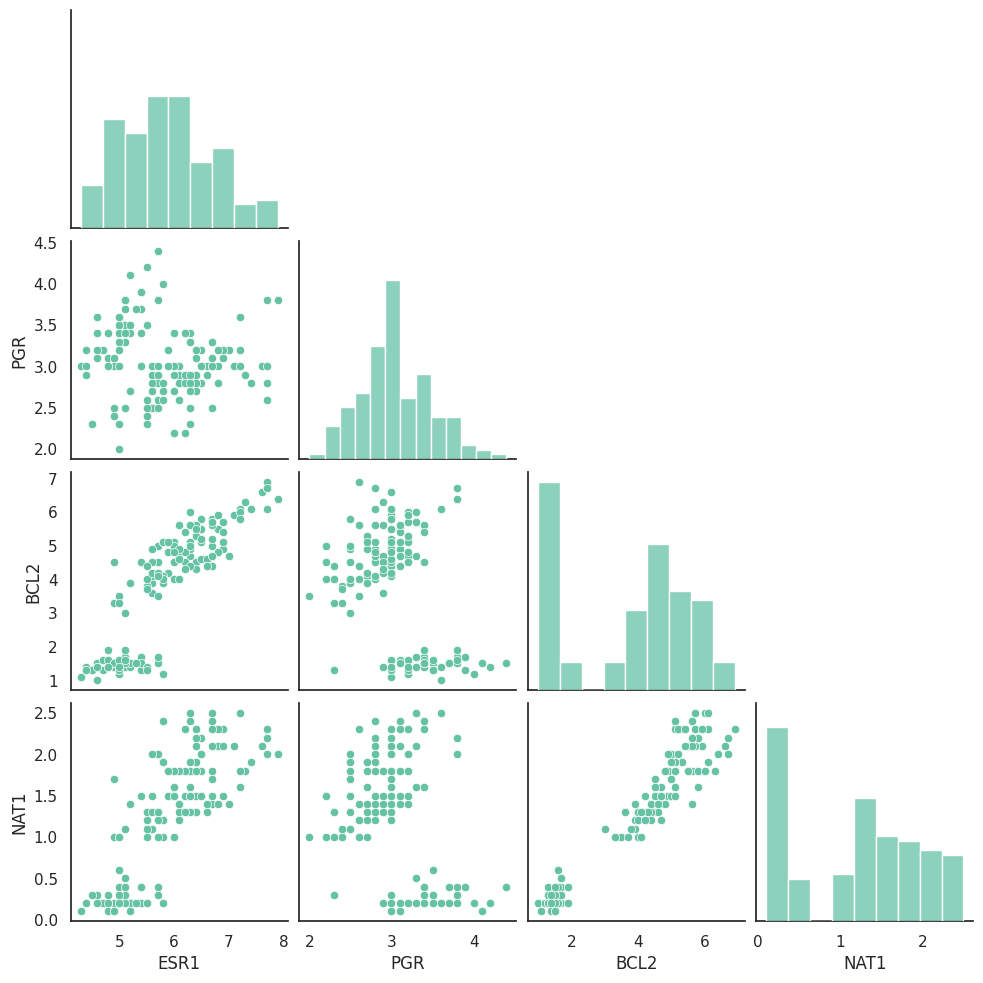

In [7]:
### Plot a pairwise comparison figure with seaborn
sns.pairplot(data, corner = True)
sns.despine()

BCL2 and NAT1 seems to be correated linearly. We want to confirm this by applying a linear regression.

# Regression and Curve fitting

## Linear regression with Scipy

<code>scipy.stats.linregress(x, y, alternative='two-sided')</code>

* **x, y**: sets of measurements
* **alternative='two-sided'**: the alternative hypothesis ($H_{a}$) is that the slope of the regression line is nonzero

Here, the null hypothesis ($H_{0}$) is that the slope is zero.

Ressource: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress

In [8]:
## Do a linear regression
reg = sp.stats.linregress(x=data.BCL2, y=data.NAT1, alternative ='two-sided')

In [9]:
## Look a the results
reg.rvalue
#if you want to access one of the variables you have to do reg.slope or other 
#rvalue is the pearson correlation coefficient, either negative or positive, +1 to -1, closer to +1 close to perfect linear correlation
#positive means correlation is ascending if x increases y also increases 
#rvalue of 0 doesn't mean no correlation, just not linear 

np.float64(0.9627570970509666)

The <code>rvalue</code> represents the correlation coefficient. The Pearson's correlation coefficient measures the linear relationship between two variables.

**Important**: a correlation of 0 does not imply no correlation!

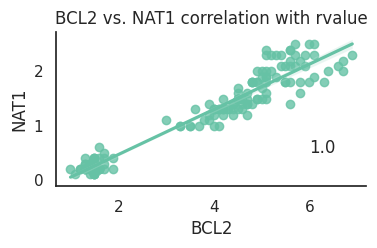

In [10]:
p = sns.regplot(data, x="BCL2", y="NAT1")
#regression plotting
p.text(6, 0.5, np.round(reg.rvalue))
p.set_title("BCL2 vs. NAT1 correlation with rvalue")

sns.despine()


<hr>

## Curve fitting with Scipy

<code>scipy.optimize.curve_fit(f, x, y)</code>

* Function is the one we want to fit on the data

* **f**: model function such that $f(x, ...)$
* **x, y**: sets of measurements


Ressource: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

In [11]:
### Linear of regression with curve_fit
### Define the model f
def linear(x, a, b) :
    y= a + b*x
    return y

In [12]:
### Do linear curve fitting of petal length vs. petal width
param, cov = sp.optimize.curve_fit(linear, data.BCL2, data.NAT1)

In [13]:
### Look at results and compare to linregress results
### Param:
print(param)

[-0.36651405  0.41641913]


In [14]:
### R Coef:
np.corrcoef(data.BCL2, data.NAT1)
#get correlation coefficient 
#each parameter against itself is equal to one

array([[1.       , 0.9627571],
       [0.9627571, 1.       ]])

<code>numpy.corrcoef()</code> returns the Pearson correlation coefficient matrix of the variables.

Ressource: https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

## SUPP. EXAMPLE 1

In [15]:
### SUPPLEMENTARY EXAMPLE

### We tested various concentrations for 12 different drugs on AML3 cells. The dataset contains the viability responses.
### Row names are log10 concentrations
### Column names are the various drugs we tested
### Cells values are the % viability of AML3 for a given concentration of a given compound.

### We are interested in finding which drug has the smallest IC50
### and which drug has the smallest minimal viability.

### We are using the loglogistic model to represent the DR relationship: f(x) = min + (max - min)/(1 + 10^(x - IC50))

### Import the data
data_DR = pd.read_csv("dose_response.tsv", sep="\t", header=0, index_col=0)
data_DR.head()

,17-AAG,5-FU,Cisplatin,Docetaxel,Erlotinib,Gemcitabine,Methotrexate,Paclitaxel,Dasatinib,Erastin,MI-2,Ibrutinib
0.00,105.365642,104.596167,101.129574,104.611240,100.827837,97.771030,99.892151,103.443733,98.183534,109.187630,93.403644,105.657292
0.45,101.565216,101.134757,112.224370,92.524450,98.901574,95.908113,92.199586,98.159898,96.205833,103.643503,94.823219,94.071434
0.90,100.033307,105.314506,97.311008,100.129630,111.514098,94.009943,92.336612,90.819773,102.504385,99.907917,89.138794,98.583086
1.35,103.455431,93.823001,102.715153,80.514468,104.753194,89.887212,95.716763,94.277135,92.090233,95.876338,81.162379,109.049417
1.80,93.130203,94.981719,94.863502,94.301608,98.597278,79.484431,92.782509,94.042318,90.970364,87.460870,71.377037,97.239645


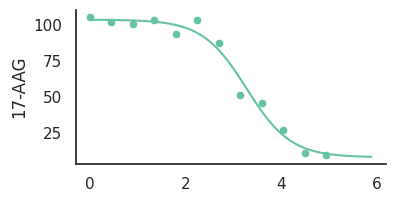

In [16]:
### Define a function for the log-logistic model
### np.power() : https://numpy.org/doc/stable/reference/generated/numpy.power.html
def log_logistic(x, Max, Min, IC50, slope) :
    return Min + ((Max - Min) / (1. + np.power(10.,slope*(x - IC50))))

### Do curve fitting (non-linear regression) on viability for 17-AAG
param, cov = sp.optimize.curve_fit(log_logistic, data_DR.index.values, data_DR["17-AAG"])
x_plot = np.arange(0, 6, 0.1)

### Plot the resulting curve
sns.scatterplot(x=data_DR.index.values, y=data_DR["17-AAG"])
sns.lineplot(x=x_plot, y=log_logistic(x_plot, param[0], param[1], param[2], param[3]))
sns.despine()

In [17]:
### Do curve fitting (non-linear regression) on viability on each drug
### Find the smallest predicted IC50 and smallest predicted Min
drugs = data_DR.columns.values

for d in drugs :
    tmp = data_DR.loc[:, d]
    param, cov = sp.optimize.curve_fit(log_logistic, tmp.index.values, tmp)
    
    print(d, ":      ", param[2], " (IC50)     ", param[1], " (Min)")

17-AAG :       3.283396277871555  (IC50)      7.89763923637438  (Min)
5-FU :       2.627665138849804  (IC50)      14.881555022456611  (Min)
Cisplatin :       3.0048428262797566  (IC50)      14.359448133087866  (Min)
Docetaxel :       2.7587541641248166  (IC50)      15.167573821209848  (Min)
Erlotinib :       3.161969650471552  (IC50)      4.798718540828059  (Min)
Gemcitabine :       2.2167197707392514  (IC50)      22.350109201437416  (Min)
Methotrexate :       2.701177355920146  (IC50)      17.14562593867  (Min)
Paclitaxel :       2.7086682498559904  (IC50)      19.951533318824946  (Min)
Dasatinib :       2.7515066381652415  (IC50)      15.125261825601143  (Min)
Erastin :       2.3250971596571857  (IC50)      22.114175104721028  (Min)
MI-2 :       1.9565847220577848  (IC50)      31.793912411605803  (Min)
Ibrutinib :       3.390710304491451  (IC50)      11.65227806914755  (Min)


<hr>

# Assess monotonicity of a relationship

The Spearman rank-order correlation coefficient is a nonparametric measure of the monotonicity of the relationship between two datasets. Like other correlation coefficients, this one varies between -1 and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact monotonic relationship. Positive correlations imply that as x increases, so does y. Negative correlations imply that as x increases, y decreases.

## Spearman's Rank coefficient with Scipy

<code>scipy.stats.spearmanr(x, y, alternative='two-sided')</code>

* **x, y**: sets of measurements
* **alternative='two-sided'**: the correlation is nonzero

Ressource: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html

In [20]:
## Calculate the Spearman's rank coefficient between BCL2 and NAT1
speaR = sp.stats.spearmanr(data.BCL2, data.NAT1)

In [21]:
## Look a the results
speaR
#this is the P (rho) correlation of when x increases so does y, it just isn't linear 

SignificanceResult(statistic=np.float64(0.9360033509355781), pvalue=np.float64(5.383649646073561e-69))

<hr>

# Clustering

Clustering methodologies allow us to automatically group similar object into sets. There exist many clustering methodologies!

![](https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png)

## k-means with scikit-learn

The KMeans algorithm clusters data by trying to separate samples in $n$ groups of equal variance, minimizing a criterion known as **within-cluster sum-of-squares**.

This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields.

At a glance, the k-means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$, each described by the mean $\mu_{j}$ of the samples in the cluster $C_{j}$. 

*In very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.*

Ressource: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

Visualization: http://alekseynp.com/viz/k-means.html

Let's apply the k-means algorithm to the BCL2 vs. PGR comparison. 

**Are we able to cluster patient/sample based on their outcome/results?**

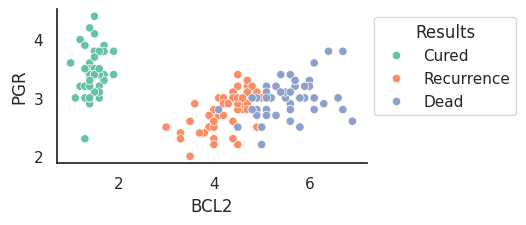

In [22]:
### Let<s plot the comparison
p = sns.scatterplot(data, x="BCL2", y="PGR", hue="Results")
sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
sns.despine()

In [121]:
### Define the subset we want to analysis
subset_KM = data.loc[:, ["BCL2", "PGR"]]
subset_KM.head()

,BCL2,PGR
0,1.4,3.5
1,1.4,3.0
2,1.3,3.2
3,1.5,3.1
4,1.4,3.6


In [122]:
### Initiate the k-means algorithm
### How many cluster should we use?
kmean_algo = sklearn.cluster.KMeans(n_clusters=3, n_init="auto")

In [123]:
### Apply kmeans to our data
kmeans_subset = kmean_algo.fit(subset_KM)
#fit is the function and subset_KM is the data we want to fit

**Attributes of the kmeans object:**

<code>kmeans.cluster_centers_</code>: coordinates of cluster centers

<code>kmeans.labels_</code>: labels of each point

In [124]:
### Get centroids coordinate
print(kmeans_subset.cluster_centers_)
cent_by_axes = kmeans_subset.cluster_centers_.T
cent_by_axes [0]

[[4.32807018 2.75087719]
 [1.464      3.418     ]
 [5.67209302 3.03255814]]


array([4.32807018, 1.464     , 5.67209302])

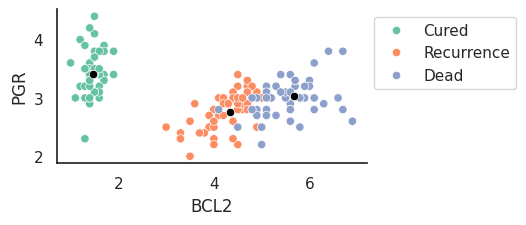

In [125]:
p = sns.scatterplot(data, x="BCL2", y="PGR", hue="Results")

### Visualize the centroide on the plot
sns.scatterplot(x=cent_by_axes[0], y=cent_by_axes[1], color="black")

sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
sns.despine()

In [126]:
### Get datapoints labels
kmeans_subset.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2], dtype=int32)

In [127]:
### Compare the kmean labels and the true grouping values (Results)
### Add two new coumns with the different grouping to our subset_KM

subset_KM.loc[:, "patient_outcomes"] = data.Results
subset_KM.loc[:, "kmeans_labels"] = kmeans_subset.labels_
subset_KM.head()

,BCL2,PGR,patient_outcomes,kmeans_labels
0,1.4,3.5,Cured,1
1,1.4,3.0,Cured,1
2,1.3,3.2,Cured,1
3,1.5,3.1,Cured,1
4,1.4,3.6,Cured,1


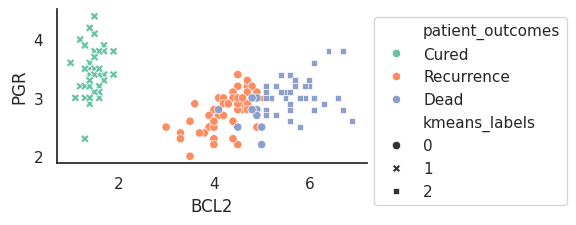

In [128]:
### Plot the comparison with the kmean labels and the true labels/groups
p=sns.scatterplot(subset_KM, x="BCL2", y="PGR", hue="patient_outcomes", style="kmeans_labels")
sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
sns.despine()

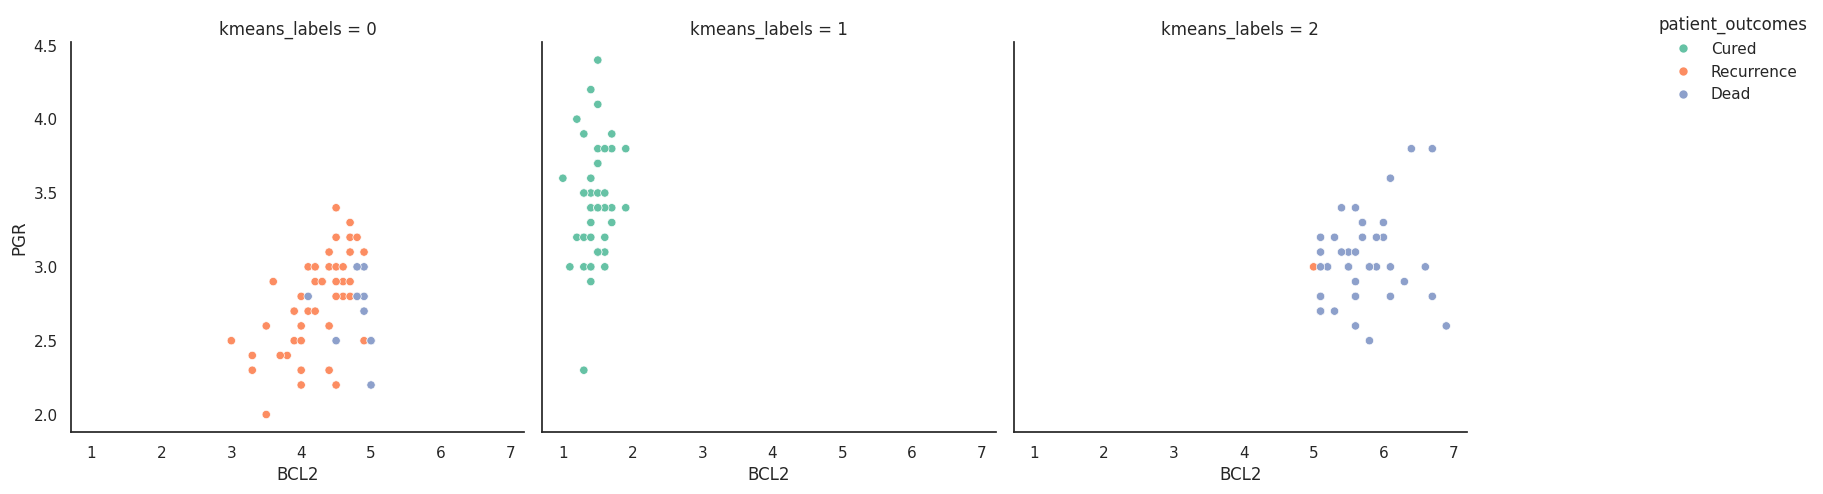

In [129]:
### Plot the comparison with the kmean labels and the true labels/groups
p=sns.relplot(subset_KM, x="BCL2", y="PGR", hue="patient_outcomes", col="kmeans_labels")
#relation plot is a scatterplot or lineplot and use column argument 
sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
sns.despine()

It is not always easy to define the number of cluster to use!

The most common approach for deciding the value of $K$ is the so-called elbow method. It involves running the algorithm multiple times over a loop, with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.

## SUPP. EXAMPLE 2

<code>inertia_</code>: sum of squared distances of samples to their closest cluster center

In [130]:
### Get the inertia of our initial kmean
kmeans_subset.inertia_

40.80747409220729

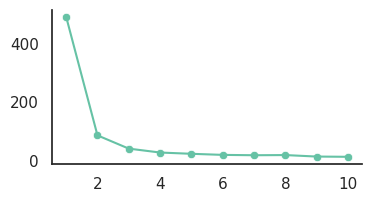

In [131]:
### Run kmeans for various k values
### initiate empty list
inertia_list = []

X = data.loc[:, ["BCL2", "PGR"]]

### Create for loop for K from 1 to 10
for k in range(1, 11) :
    kmean = sklearn.cluster.KMeans(n_clusters=k, n_init="auto")
    kmeans_X = kmean.fit(X)
    
    ## Add the inertia to the list
    inertia_list += [kmeans_X.inertia_]
    
### Plot K vs. intertia
sns.lineplot(x=np.arange(1, 11), y=inertia_list)
sns.scatterplot(x=np.arange(1, 11), y=inertia_list)
sns.despine()

# Dimensionality reduction

Dimensionality reduction allows use to reduce th enumber of random variables to consider. It is primarly useful for visualisation purpose and to increase the efficiency of other analysis methods (eg. clustering).

## PCA with scikit learn

**PCA** = Principal Component Analysis

PCA is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. *We are trading a little bit of accuracy for simplicity*.

Ressource: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

In [135]:
### View our cancer dataset
data
#PCA works only with numerical, not categorical values!

,ESR1,PGR,BCL2,NAT1,Results
0,5.1,3.5,1.4,0.2,Cured
1,4.9,3.0,1.4,0.2,Cured
2,4.7,3.2,1.3,0.2,Cured
3,4.6,3.1,1.5,0.2,Cured
4,5.0,3.6,1.4,0.2,Cured
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Dead
146,6.3,2.5,5.0,1.9,Dead
147,6.5,3.0,5.2,2.0,Dead
148,6.2,3.4,5.4,2.3,Dead


In [137]:
### PCA, like Kmeans, can only be aplied to numerical data
### Create a subset of the data
subset_PCA = data.iloc[:, 0:4]
subset_PCA.head()
#iloc for index loc

,ESR1,PGR,BCL2,NAT1
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [138]:
# Instantiate a new scaler: we want the data to be on the same scale
scaler = sklearn.preprocessing.StandardScaler()
scaler.fit(subset_PCA)

# Apply the pattern
subset_scaled = scaler.transform(subset_PCA) 

In [139]:
### Initiate the PCA and apply it to the scaled data
pca = sklearn.decomposition.PCA(n_components=4)
pca.fit(subset_scaled)

PCA(n_components=4)

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components.

**Attributes of the pca object:**

<code>pca.n_features_in_</code>: number of features in the training data

<code>pca.n_samples_</code>: number of samples in the training data

In [140]:
print("Number of features: ", pca.n_features_in_)
print("Number of samples: ", pca.n_samples_)

Number of features:  4
Number of samples:  150


PCA tries to put the maximum possible information in the first component, then the maximum remaining information in the second and so on.

<code>pca.explained_variance_</code>: amount of variance explained by each of the selected components

<code>pca.explained_variance_ratio_</code>: Percentage of variance explained by each of the selected components.

In [141]:
## Get the explained_variance
pca.explained_variance_

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [142]:
## Get the explained_variance_ratio_
## What do you notice?
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

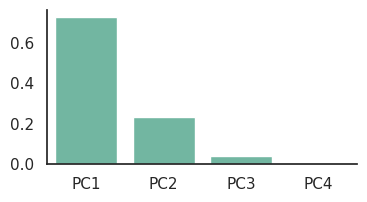

In [143]:
## Plot the explained_variance_ratio_
## Bar plot: https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x= ["PC1", "PC2", "PC3", "PC4"], y=pca.explained_variance_ratio_)
sns.despine()

In [144]:
### How much of the variance would be explained if we were only to look at the two
### first component?
pca.explained_variance_ratio_[0:2].sum()

np.float64(0.9580097536148199)

In [148]:
### Apply the dimensionality reduction to our data
pca_reduce = pca.fit_transform(subset_scaled)

### Make a dataframe and add the label column
data_reduce = pd.DataFrame(pca_reduce)
data_reduce.loc[:, "patient_outcomes"] = data.Results

data_reduce.head()

,0,1,2,3,patient_outcomes
0,-2.264542,0.505704,0.121943,-0.023073,Cured
1,-2.086426,-0.655405,0.227251,-0.103208,Cured
2,-2.367950,-0.318477,-0.051480,-0.027825,Cured
3,-2.304197,-0.575368,-0.098860,0.066311,Cured
4,-2.388777,0.674767,-0.021428,0.037397,Cured


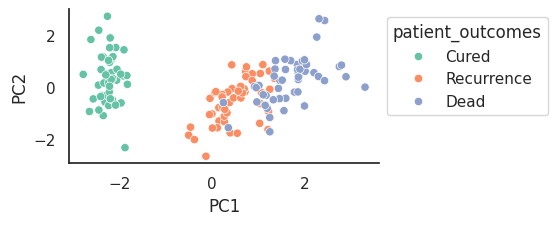

In [155]:
### Plot the two first components
### Did our PCA was able to capture the true grouping?
p = sns.scatterplot(data_reduce, x=0, y=1, hue="patient_outcomes")

p.set_xlabel('PC1')
p.set_ylabel('PC2')
sns.move_legend(p, "upper left", bbox_to_anchor=(1,1))
sns.despine()

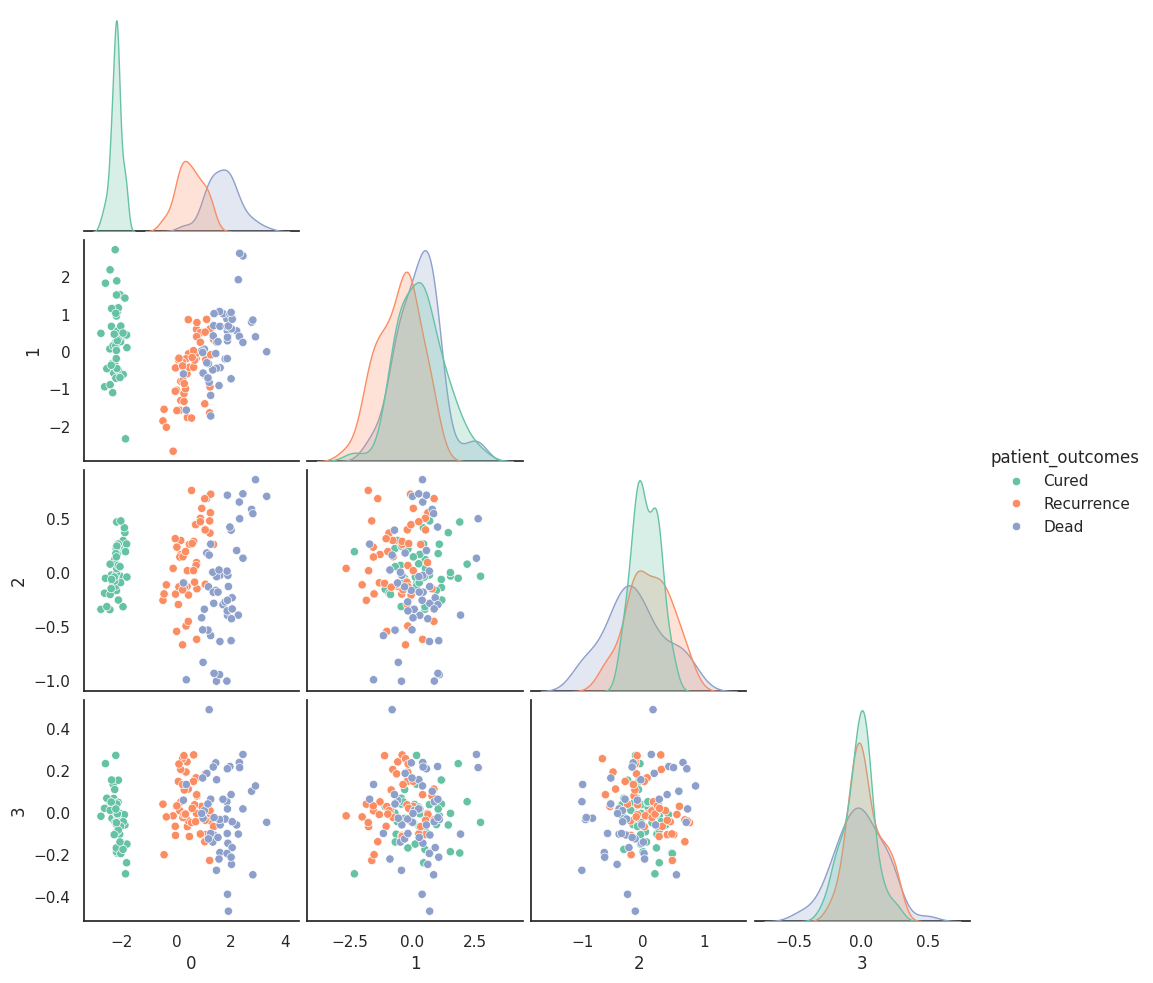

In [156]:
sns.pairplot(data_reduce, corner=True, hue='patient_outcomes')

What can be said of the above plot?

Remember, the principal components are less interpretable and don’t have any real meaning since they are constructed as linear combinations of the initial variables...

### Other ressources to learn more about PCA
* https://builtin.com/data-science/step-step-explanation-principal-component-analysis
* https://www.youtube.com/watch?v=HMOI_lkzW08
* https://www.youtube.com/watch?v=FgakZw6K1QQ